In [163]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import pickle

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    AdaBoostRegressor,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
    mean_squared_error,
    cohen_kappa_score
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from string import punctuation 

In [165]:
np.random.seed(123)

In [166]:
# result = pd.read_csv('data/processed_essays.tsv', sep='\t')
result = pd.read_csv('data/processed_data_8.tsv', sep='\t')

c:\users\trevis\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


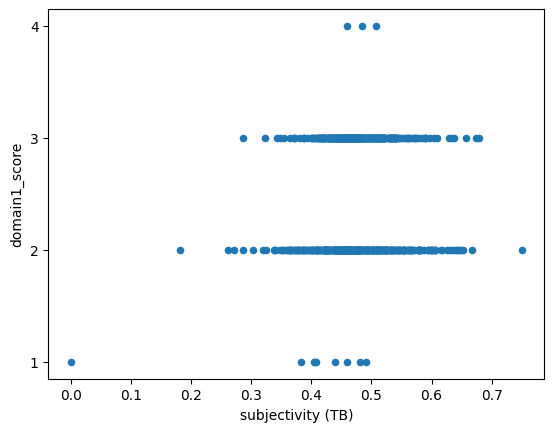

In [167]:
chart = result.plot(kind='scatter', x='subjectivity (TB)', y='domain1_score')
plt.locator_params('y', nbins=4)

In [168]:
result.shape

(723, 57)

In [169]:
# X = pd.DataFrame(result, columns=('essay', ))
# X = result['lexical_range']
X = pd.DataFrame(result, columns=(
    'ADJ',
    'ADV',
    'ADP',
    'NOUN', 
    'VERB',
    'INTJ',
    'PART',
    'SCONJ',
    'CCONJ',
    'word_count', 
    'sent_count', 
    'polarity (TB)',
    'subjectivity (TB)',
    'positive (VD)',
    'negative (VD)',
    'neutral (VD)',
    'compound (VD)',
    'spelling_errors', 
    'correct_spellings', 
    'lexical_diversity',
    'unique_words',
    'relevance (TF-IDF)',
    'readability',
    'grammar_errors',
#     'relevance (CV)',
))
y = result['domain1_score']
X.isnull().sum()

ADJ                   0
ADV                   0
ADP                   0
NOUN                  0
VERB                  0
INTJ                  0
PART                  0
SCONJ                 0
CCONJ                 0
word_count            0
sent_count            0
polarity (TB)         0
subjectivity (TB)     0
positive (VD)         0
negative (VD)         0
neutral (VD)          0
compound (VD)         0
spelling_errors       0
correct_spellings     0
lexical_diversity     0
unique_words          0
relevance (TF-IDF)    0
readability           0
grammar_errors        0
dtype: int64

In [170]:
# corr = pd.DataFrame(result, columns=('domain1_score', 'adj', 'noun', 'verb', 'adv', 'misspelt', 'correct_spellings', 'lexical_diversity')).corr()
corr = pd.DataFrame(result, columns=(
    'domain1_score', 
    'ADJ',
    'ADV',
    'ADP',
    'NOUN', 
    'VERB',
    'INTJ',
    'PART',
    'SCONJ',
    'CCONJ',
    'word_count', 
    'sent_count', 
    'polarity (TB)',
    'subjectivity (TB)',
    'positive (VD)',
    'negative (VD)',
    'neutral (VD)',
    'compound (VD)',
    'spelling_errors', 
    'correct_spellings', 
    'lexical_diversity',
    'unique_words',
    'relevance (TF-IDF)',
    'readability',
    'grammar_errors',
#     'relevance (CV)',
)).corr()
corr.style.background_gradient(cmap='coolwarm')

,domain1_score,ADJ,ADV,ADP,NOUN,VERB,INTJ,PART,SCONJ,CCONJ,word_count,sent_count,polarity (TB),subjectivity (TB),positive (VD),negative (VD),neutral (VD),compound (VD),spelling_errors,correct_spellings,lexical_diversity,unique_words,relevance (TF-IDF),readability,grammar_errors
domain1_score,1.000000,0.414184,0.298725,0.424057,0.435515,0.324652,-0.162879,0.263164,0.201299,0.178872,0.438119,0.426960,-0.093980,0.063350,0.013360,0.041189,-0.031416,0.095693,0.180401,0.415164,-0.179591,0.513626,0.232519,0.083561,-0.309158
ADJ,0.414184,1.000000,0.635465,0.695981,0.732161,0.642978,0.021749,0.567091,0.503821,0.527172,0.798057,0.597791,-0.034669,0.158563,0.169623,0.070306,-0.190902,0.174665,0.307776,0.764795,0.141472,0.753690,0.319063,0.119526,-0.009296
ADV,0.298725,0.635465,1.000000,0.657950,0.591747,0.755810,0.226169,0.636125,0.603809,0.578863,0.729682,0.601459,-0.113042,0.029368,-0.006543,0.027905,-0.007030,0.107956,0.350237,0.671019,0.224016,0.635460,0.138952,0.078058,0.169871
ADP,0.424057,0.695981,0.657950,1.000000,0.878412,0.813027,0.093092,0.615512,0.517360,0.578616,0.896632,0.664923,-0.223215,-0.068565,-0.215266,-0.032906,0.215802,0.096512,0.399256,0.837317,0.081590,0.865904,0.097874,0.124736,0.055971
NOUN,0.435515,0.732161,0.591747,0.878412,1.000000,0.770339,0.089351,0.554772,0.469019,0.548417,0.936231,0.692130,-0.139670,-0.056242,-0.139309,-0.043820,0.150072,0.145627,0.456642,0.857981,0.120249,0.895205,0.165776,0.190947,0.073382
VERB,0.324652,0.642978,0.755810,0.813027,0.770339,1.000000,0.243668,0.768710,0.672800,0.658627,0.904899,0.745284,-0.172592,-0.058842,-0.119314,0.001664,0.110165,0.116797,0.525396,0.794775,0.274179,0.792885,0.057153,0.150409,0.237079
INTJ,-0.162879,0.021749,0.226169,0.093092,0.089351,0.243668,1.000000,0.144016,0.119965,0.160210,0.165740,0.196110,-0.047014,0.005012,-0.034892,-0.038735,0.049984,0.001299,0.246358,0.083951,0.200921,0.087067,-0.135354,0.144194,0.470499
PART,0.263164,0.567091,0.636125,0.615512,0.554772,0.768710,0.144016,1.000000,0.611218,0.544989,0.686451,0.529902,-0.101817,0.019979,-0.061557,0.075757,0.021937,0.036176,0.356528,0.620165,0.258593,0.585749,0.060104,0.098080,0.152318
SCONJ,0.201299,0.503821,0.603809,0.517360,0.469019,0.672800,0.119965,0.611218,1.000000,0.516118,0.593502,0.387453,-0.053960,0.013741,0.032737,0.011918,-0.036242,0.126553,0.243221,0.562883,0.335887,0.466562,0.169819,0.037376,0.176360
CCONJ,0.178872,0.527172,0.578863,0.578616,0.548417,0.658627,0.160210,0.544989,0.516118,1.000000,0.642540,0.353604,-0.084099,-0.026273,-0.012716,0.009691,0.007288,0.073645,0.149016,0.656305,0.275327,0.530005,0.075730,0.048642,0.258394


In [171]:
print(X.shape)
print(y.shape)

(723, 24)
(723,)


In [172]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
)

In [173]:
X_train

,ADJ,ADV,ADP,NOUN,VERB,INTJ,PART,SCONJ,CCONJ,word_count,...,negative (VD),neutral (VD),compound (VD),spelling_errors,correct_spellings,lexical_diversity,unique_words,relevance (TF-IDF),readability,grammar_errors
355,47,49,69,133,90,0,22,21,24,238,...,0.035,0.730,0.9996,48,190,1.652778,144,0.813116,7.108448,5
396,46,46,57,102,103,0,28,21,34,240,...,0.104,0.712,0.9973,26,214,1.276596,188,0.762456,7.071843,7
60,10,16,25,53,49,0,8,4,12,109,...,0.088,0.684,0.9935,13,96,1.362500,80,0.817424,6.048003,12
718,48,63,70,126,131,3,24,26,55,264,...,0.076,0.739,0.9989,73,191,1.450549,182,0.844232,7.864003,20
456,42,59,76,100,114,3,31,23,20,235,...,0.151,0.698,0.9288,34,201,1.525974,154,0.000000,6.161981,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,43,37,61,100,95,4,10,6,33,230,...,0.058,0.632,0.9996,29,201,1.564626,147,0.577350,7.327387,25
106,73,70,95,98,136,0,26,26,46,264,...,0.075,0.692,0.9994,17,247,1.491525,177,0.788405,6.972356,8
270,28,26,25,44,64,3,11,18,10,126,...,0.039,0.640,0.9990,3,123,1.500000,84,0.779579,6.235096,15
435,19,24,28,37,57,0,14,19,17,110,...,0.076,0.802,0.9494,14,96,1.264368,87,0.723747,6.948592,23


In [174]:
y_train

355    3
396    3
60     2
718    2
456    2
      ..
71     2
106    3
270    2
435    3
102    2
Name: domain1_score, Length: 614, dtype: int64

In [175]:
autograder = Pipeline(steps=[
#     ('preprocessing', TfidfVectorizer()),
    ('random_forest', RandomForestClassifier(n_estimators=1000, criterion='entropy'))
#     ('linear', LinearRegression()),
#     ('naive_bayes', MultinomialNB()),
])

In [176]:
autograder.fit(X_train, y_train)

Pipeline(steps=[('random_forest',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=1000))])

In [177]:
pickle.dump(autograder, open('data/model_8.sav', 'wb'))

In [178]:
y_preds = autograder.predict(X_valid)

In [179]:
# # accuracy_score(y_valid, y_preds)
# mse = mean_squared_error(y_valid, y_preds)
# rmse = math.sqrt(mse)
# print(mse)
# print('Accuracy for Random Forest', 100 * max(0, rmse)) 

In [180]:
# r2 = autograder.score(X_valid, y_valid)
# print(f'{r2 * 100}%')

[2]


<AxesSubplot: >

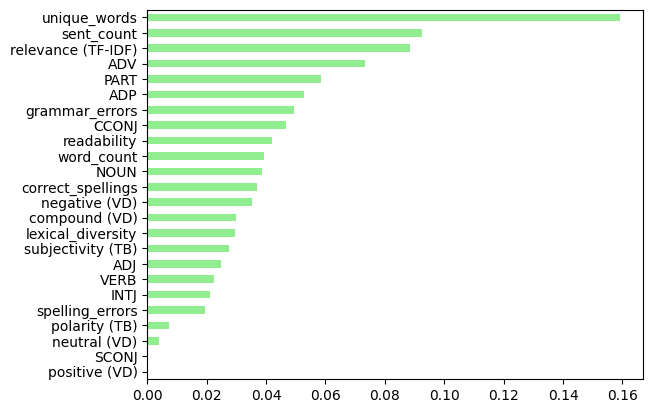

In [181]:
custom_data = pd.read_csv('data/processed_data_TEMP.tsv', sep='\t')
Xcustom = pd.DataFrame(custom_data, columns=(
    'ADJ',
    'ADV',
    'ADP',
    'NOUN', 
    'VERB',
    'INTJ',
    'PART',
    'SCONJ',
    'CCONJ',
    'word_count', 
    'sent_count', 
    'polarity (TB)',
    'subjectivity (TB)',
    'positive (VD)',
    'negative (VD)',
    'neutral (VD)',
    'compound (VD)',
    'spelling_errors', 
    'correct_spellings', 
    'lexical_diversity',
    'unique_words',
    'relevance (TF-IDF)',
    'readability',
    'grammar_errors',
))
predicted_score = autograder.predict(Xcustom)
print(predicted_score)

# Create a pd.Series of features importances
importances = pd.Series(data=autograder[0][1].feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
# plt.title('Features Importances')
# plt.show()

In [182]:
accuracy_score(y_valid, y_preds)

0.7798165137614679

In [183]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           2       0.83      0.75      0.79        59
           3       0.73      0.82      0.77        50

    accuracy                           0.78       109
   macro avg       0.78      0.78      0.78       109
weighted avg       0.79      0.78      0.78       109



In [184]:
cohen_kappa_score(y_valid, y_preds, weights='quadratic')

0.5606315082297615

<AxesSubplot: >

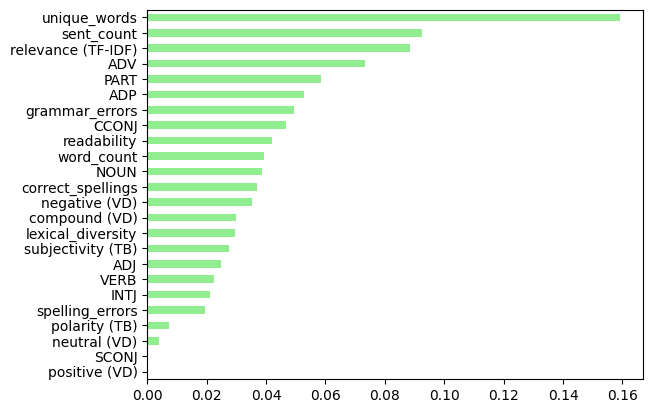

In [185]:
# Create a pd.Series of features importances
importances = pd.Series(data=autograder[0][1].feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
# plt.title('Features Importances')
# plt.show()